# Nearest Neighbor Classifier Application [Digits recognition]
Also from [CS50 2016 - Week 7 - Machine Learning](https://www.youtube.com/watch?v=dgt6IfEXgDk&t=89s)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

## About the Dataset

In [3]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### Inspect the first image

In [4]:
print(digits.images[0])

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


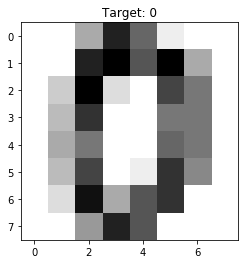

In [5]:
plt.figure()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation="nearest")
plt.title("Target: " + str(digits.target[0]))
plt.show()

## First Approach, training with the first 10 cases

In [6]:
features_train = digits.data[:10]
labels_train = digits.target[:10]

In [7]:
sample_id = 345
features_test = digits.data[sample_id]
target_test = digits.target[sample_id]

### Plot the sample test

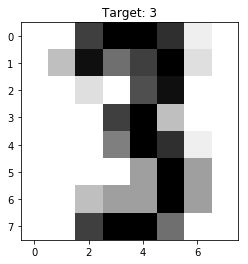

In [8]:
plt.figure()
plt.imshow(digits.images[sample_id], cmap=plt.cm.gray_r, interpolation="nearest")
plt.title("Target: " + str(target_test))
plt.show()

### Applying the Nearest Neighbor Classifier

In [9]:
def dist(x: np.array, y: np.array) -> np.array:
    return np.sqrt(np.sum((x - y) ** 2))

In [10]:
distances = np.zeros(len(features_train))

for i, sample_train in enumerate(features_train):
    distances[i] = dist(sample_train, features_test)
min_index = np.argmin(distances)
print("Prediction: {}".
      format("Succeess" if labels_train[min_index] == digits.target[min_index] else "Fail"))

Prediction: Succeess


### Calculating the accuracy score with 100 samples

In [11]:
distances = np.zeros(len(features_train))
errors = 0
test_sample_size = 100
start_at = len(digits.data) - test_sample_size

for target_index, sample_test in enumerate(digits.data[start_at:], start_at):
    for i, sample_train in enumerate(features_train):
        distances[i] = dist(sample_train, sample_test)
    min_index = np.argmin(distances)
    if labels_train[min_index] != digits.target[target_index]:
        errors += 1
        
print("{} Errors in {} cases. Accuracy Score: {}%".
      format(errors, test_sample_size, (test_sample_size - errors) * 100 / test_sample_size))

37 Errors in 100 cases. Accuracy Score: 63.0%


### Improving the performance by adding more training samples

In [12]:
features_train = digits.data[:start_at] # 1697 cases
labels_train = digits.target[:start_at]

In [13]:
distances = np.zeros(len(features_train))
errors = 0
test_sample_size = 100
start_at = len(digits.data) - test_sample_size

for target_index, sample_test in enumerate(digits.data[start_at:], start_at):
    for i, sample_train in enumerate(features_train):
        distances[i] = dist(sample_train, sample_test)
    min_index = np.argmin(distances)
    if labels_train[min_index] != digits.target[target_index]:
        errors += 1
        
print("{} Errors in {} cases. Accuracy Score: {}%".
      format(errors, test_sample_size, (test_sample_size - errors) * 100 / test_sample_size))

2 Errors in 100 cases. Accuracy Score: 98.0%


#### :wq